# FOREX_chfjpy

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing


In [507]:
# Creating the function that returns the percentage of each class in the dataset 

def imbalance(elements):
    percent=[]
    sum_of_elements=np.sum(elements)
    for i in range(len(elements)):
        percent.append((elements[i]/sum_of_elements)*100)
    return percent

In [509]:
# Function to create imbalanced dataset, imb_percent represents the imbalance in decimals.

def create_imbalanced_data_for_stars(imb_percent, size_of_one_class):
    size = int(size_of_one_class/imb_percent)
    data_0 = dforex.query("Class==0").sample(size-size_of_one_class)
    data_1 = dforex.query("Class==1")
    return pd.concat([data_0, data_1])

In [510]:
# Reading the file and checking if any null values are present

dforex = pd.read_csv("FOREX_chfjpy.csv")
print(dforex.info())
print("Null values present - ,", dforex.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   1832 non-null   object 
 1   Bid_Open    1832 non-null   float64
 2   Bid_High    1832 non-null   float64
 3   Bid_Low     1832 non-null   float64
 4   Bid_Close   1832 non-null   float64
 5   Bid_Volume  1832 non-null   float64
 6   Ask_Open    1832 non-null   float64
 7   Ask_High    1832 non-null   float64
 8   Ask_Low     1832 non-null   float64
 9   Ask_Close   1832 non-null   float64
 10  Ask_Volume  1832 non-null   float64
 11  Class       1832 non-null   bool   
dtypes: bool(1), float64(10), object(1)
memory usage: 159.4+ KB
None
Null values present - , False


In [511]:
# displaying the data

dforex.head()

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2011-12-31T23:00:00',81.863,81.952,81.863,81.952,0.0000,81.961,82.008,81.961,82.008,0.0000,False
1,'2012-01-01T23:00:00',81.954,82.304,81.636,81.787,35782.4102,81.986,82.423,81.748,81.848,35244.9298,True
2,'2012-01-02T23:00:00',81.791,82.364,81.712,82.301,155866.2610,81.854,82.395,81.736,82.341,156616.0903,False
3,'2012-01-03T23:00:00',82.301,82.402,81.275,81.445,132793.3208,82.337,82.438,81.290,81.478,131859.6802,False
4,'2012-01-04T23:00:00',81.444,81.529,80.795,80.934,172505.1388,81.477,81.548,80.810,80.974,180069.3571,False


In [512]:
# checking if Timestamp contains only unique records

dforex["Timestamp"].value_counts()

'2011-12-31T23:00:00'    1
'2016-09-11T23:00:00'    1
'2016-09-07T23:00:00'    1
'2016-09-06T23:00:00'    1
'2016-09-05T23:00:00'    1
                        ..
'2014-04-22T23:00:00'    1
'2014-04-21T23:00:00'    1
'2014-04-20T23:00:00'    1
'2014-04-17T23:00:00'    1
'2018-12-31T23:00:00'    1
Name: Timestamp, Length: 1832, dtype: int64

###### Since our 'Class' is of bool type, we will encode it using the LABEL ENCODING before plotting the graphs

In [513]:
# encoding the Class with label encoder

label_encoder = preprocessing.LabelEncoder()
dforex['Class']= label_encoder.fit_transform(dforex['Class']) 
dforex.head()

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2011-12-31T23:00:00',81.863,81.952,81.863,81.952,0.0000,81.961,82.008,81.961,82.008,0.0000,0
1,'2012-01-01T23:00:00',81.954,82.304,81.636,81.787,35782.4102,81.986,82.423,81.748,81.848,35244.9298,1
2,'2012-01-02T23:00:00',81.791,82.364,81.712,82.301,155866.2610,81.854,82.395,81.736,82.341,156616.0903,0
3,'2012-01-03T23:00:00',82.301,82.402,81.275,81.445,132793.3208,82.337,82.438,81.290,81.478,131859.6802,0
4,'2012-01-04T23:00:00',81.444,81.529,80.795,80.934,172505.1388,81.477,81.548,80.810,80.974,180069.3571,0


In [514]:
# changing the datatype of Timestamp column to datetime

dforex['Timestamp'] = pd.to_datetime(dforex['Timestamp'])

In [515]:
# print the value counts of Class column and get the imbalance 

print(dforex["Class"].value_counts())
imbalance([dforex["Class"].value_counts()[0], dforex["Class"].value_counts()[1]])

1    921
0    911
Name: Class, dtype: int64


[49.72707423580786, 50.272925764192145]

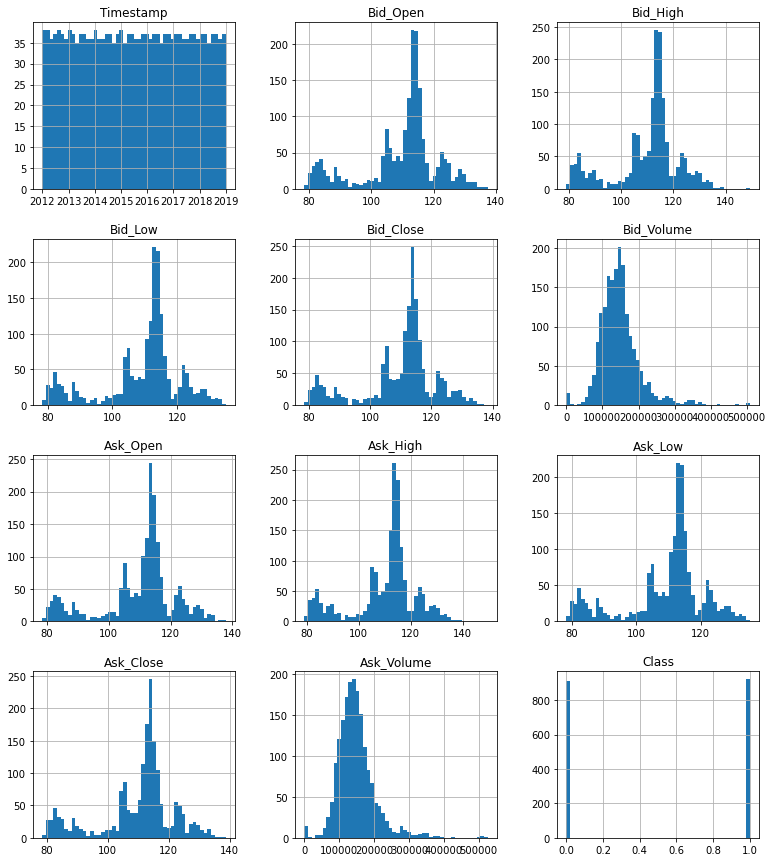

In [516]:
# plotting the columns

_ = dforex.hist(bins=50, figsize=(13,15))

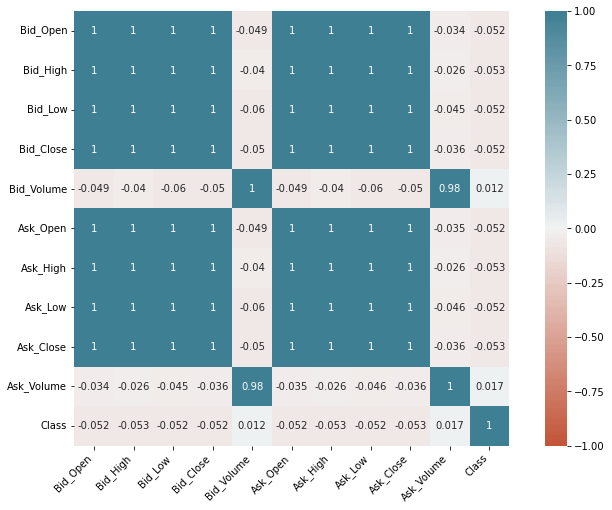

In [517]:
# creating a correlation matrix

plt.figure(figsize = (13,8))
ax = sn.heatmap(
    dforex.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Forex_chfjpy with low imbalance 

In [520]:
# adding 65% imbalance to the data

data_imbalanced_1 = create_imbalanced_data_for_stars(0.65, 900)
print(imbalance([data_imbalanced_1["Class"].value_counts()[0], data_imbalanced_1["Class"].value_counts()[1]]))
data_imbalanced_1["Class"].value_counts()

[34.44839857651246, 65.55160142348755]


1    921
0    484
Name: Class, dtype: int64

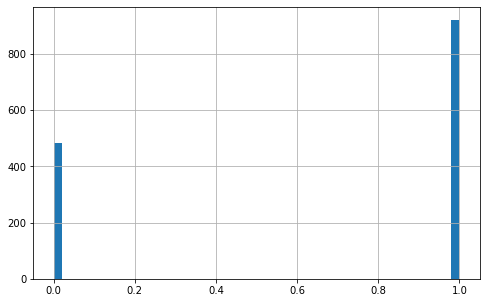

In [519]:
_ = data_imbalanced_1["Class"].hist(bins=50, figsize=(8,5))

## Forex_chfjpy with medium imbalance 

In [521]:
# adding 75% imbalance to the dataset

data_imbalanced_2 = create_imbalanced_data_for_stars(0.75, 900)
print(imbalance([data_imbalanced_2["Class"].value_counts()[0], data_imbalanced_2["Class"].value_counts()[1]]))
data_imbalanced_2["Class"].value_counts()

[24.57002457002457, 75.42997542997543]


1    921
0    300
Name: Class, dtype: int64

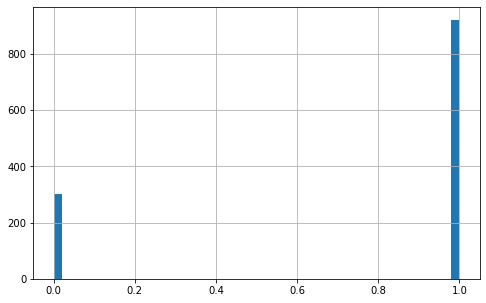

In [522]:
_ = data_imbalanced_2["Class"].hist(bins=50, figsize=(8,5))

## Forex_chfjpy dataset with high imbalance 

In [523]:
# adding high imbalance - 90%

data_imbalanced_3 = create_imbalanced_data_for_stars(0.90, 900)
print(imbalance([data_imbalanced_3["Class"].value_counts()[0], data_imbalanced_3["Class"].value_counts()[1]]))
data_imbalanced_3["Class"].value_counts()

[9.79431929480901, 90.205680705191]


1    921
0    100
Name: Class, dtype: int64

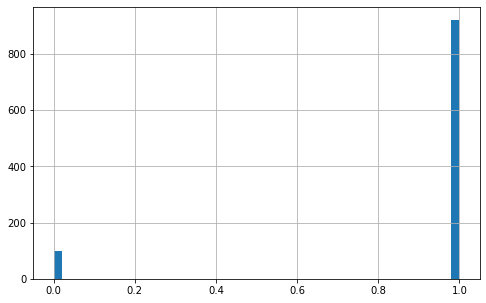

In [501]:
_ = data_imbalanced_3["Class"].hist(bins=50, figsize=(8,5))